In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression

from sklearn.manifold import Isomap

In [3]:
file_path_math = 'student/student-mat.csv'
file_path_port = 'student/student-por.csv'
df = pd.read_csv(file_path_port, sep = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


The following is given by the creator of the Dataset, we can use it as a guide to pre-process the data


1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira) <br />
2 sex - student's sex (binary: "F" - female or "M" - male) <br />
3 age - student's age (numeric: from 15 to 22) <br />
4 address - student's home address type (binary: "U" - urban or "R" - rural) <br />
5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3) <br />
6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart) <br />
7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) <br />
8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education) <br />
9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") <br />
10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other") <br />
11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other") <br />
12 guardian - student's guardian (nominal: "mother", "father" or "other") <br />
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) <br />
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) <br />
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) <br />
16 schoolsup - extra educational support (binary: yes or no) <br />
17 famsup - family educational support (binary: yes or no) <br />
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) <br />
19 activities - extra-curricular activities (binary: yes or no) <br />
20 nursery - attended nursery school (binary: yes or no) <br />
21 higher - wants to take higher education (binary: yes or no) <br />
22 internet - Internet access at home (binary: yes or no) <br />
23 romantic - with a romantic relationship (binary: yes or no) <br />
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) <br />
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) <br />
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) <br />
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) <br />
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) <br />
29 health - current health status (numeric: from 1 - very bad to 5 - very good) <br />
30 absences - number of school absences (numeric: from 0 to 93) <br />

31 G1 - first period grade (numeric: from 0 to 20) <br />
31 G2 - second period grade (numeric: from 0 to 20) <br />
32 G3 - final grade (numeric: from 0 to 20, output target)

In [4]:
binary_features = ['school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_features = ['sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian']

for feature in binary_features:
    df1 = df.copy(deep = True)
    df1[feature] = pd.Categorical(df1[feature])
    df[feature] = df1[feature].cat.codes

for feature in nominal_features:
    df1 = pd.get_dummies(df[feature], dtype='float')
    df = df.drop(columns = [feature])
    df = pd.concat([df, df1], axis = 1)

# Some duplicate columns names exist
for feature in df.columns:
    cols = df.columns.tolist()
    seen = {}
    for i, col in enumerate(cols):
        if col in seen:
            seen[col] += 1
            cols[i] = f"{col}_{seen[col]}"
        else:
            seen[col] = 0
    df.columns = cols

df.columns

Index(['school', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'F',
       'M', 'R', 'U', 'at_home', 'health_1', 'other', 'services', 'teacher',
       'at_home_1', 'health_2', 'other_1', 'services_1', 'teacher_1', 'course',
       'home', 'other_2', 'reputation', 'father', 'mother', 'other_3'],
      dtype='object')

In [5]:
# Standardize data
scaler = StandardScaler()
scaler_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

scaled_data = scaler.fit_transform(df[scaler_features])
scaled_data = pd.DataFrame(scaled_data, columns=scaler_features)

# Update the original dataframe with scaled values
scaled_data['G3'] = df['G3']

df[scaler_features] = scaled_data

df

,school,age,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,...,other_1,services_1,teacher_1,course,home,other_2,reputation,father,mother,other_3
0,0,1.031695,0,0,1.310216,1.540715,0.576718,0.083653,-0.374305,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0.210137,0,1,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-1.432980,1,1,-1.336039,-1.188832,-0.760032,0.083653,-0.374305,1,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0,-1.432980,0,1,1.310216,-0.278983,-0.760032,1.290114,-0.374305,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,-0.611422,0,1,0.428131,0.630866,-0.760032,0.083653,-0.374305,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,1.853254,0,1,-0.453954,0.630866,-0.760032,1.290114,1.312667,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
645,1,1.031695,1,1,0.428131,-1.188832,-0.760032,0.083653,-0.374305,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,1,1.031695,0,1,-1.336039,-1.188832,0.576718,0.083653,-0.374305,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
647,1,0.210137,1,1,0.428131,-1.188832,0.576718,-1.122808,-0.374305,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
# Split the training data

test_split = 0.30 # Originally did 0.15 but I think test data was too small, had better results
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(columns='G3'), df['G3'], test_size = test_split, random_state = 10000)

In [7]:
# Model and Training (Linear Regression)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(f"Standard R2 Score: {r2_score(Y_test, Y_pred)}")

# Some scores for visualization
for i in range(0,5):
    print(f"For student {i}, model prediction: {Y_pred[i]}, actual score: {Y_test.iloc[i]}")

Standard R2 Score: 0.8479261868401771
For student 0, model prediction: 12.621903689278149, actual score: 12
For student 1, model prediction: 15.089119907122045, actual score: 16
For student 2, model prediction: 14.412851097166445, actual score: 15
For student 3, model prediction: 17.92641734668741, actual score: 18
For student 4, model prediction: 11.495479010459638, actual score: 11


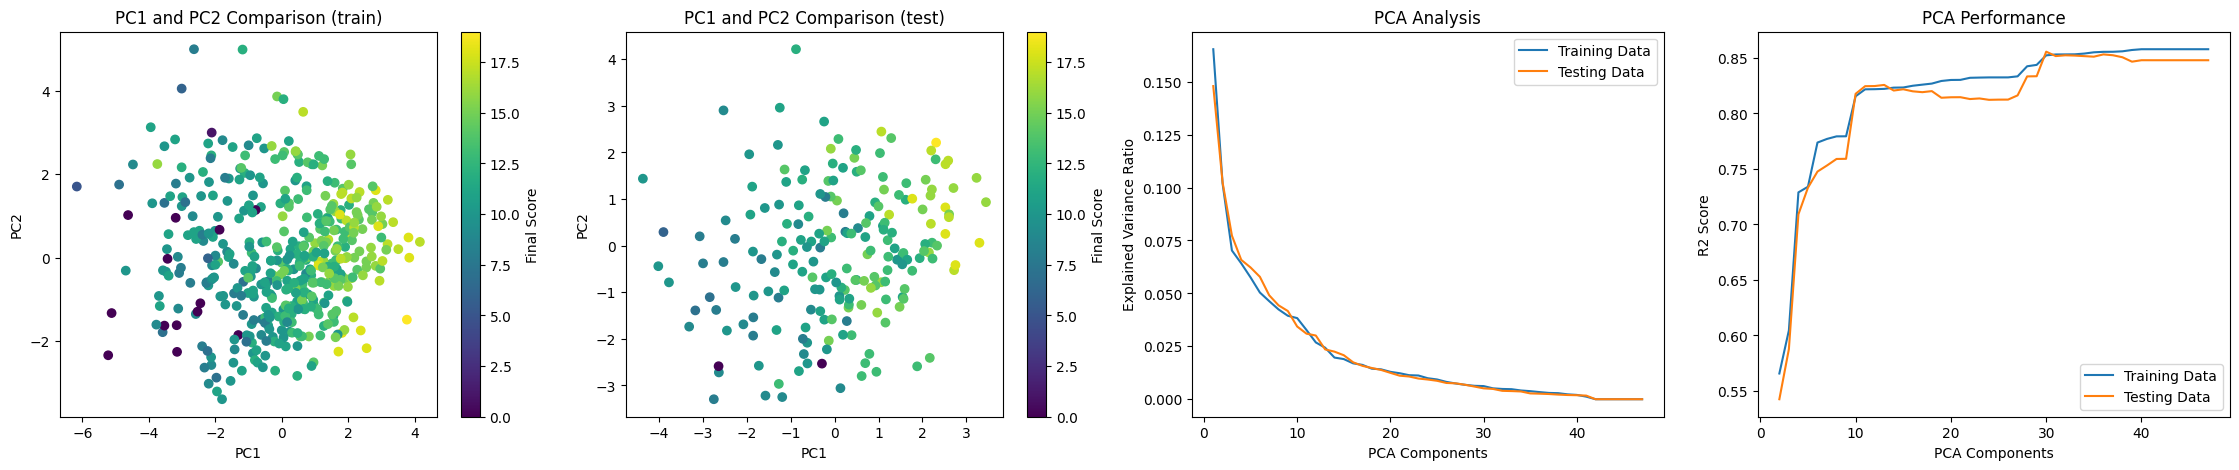

In [8]:
# Set up arrays for plotting
performance_train = []
performance_test = []
pca_components = []
X_train_pca = X_train_pca = Y_train_pca = Y_test_pca = 0
model_pca_list = []

# Loop over different numbers of components
for i in range(2, df.shape[1]):

    # Save PCA components used
    pca_components.append(i)

    # Split data
    X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(df.drop(columns='G3'), df['G3'], test_size = test_split, random_state = 10000)

    # Modify data using PCA
    pca = PCA(n_components = i)

    principle_components_train = pca.fit_transform(X_train_pca)
    explained_variance_ratio_train = pca.explained_variance_ratio_
    principle_components_test = pca.transform(X_test_pca)

    # Get test explained variance separately
    pca_test = PCA(n_components = i)
    test_fit = pca_test.fit_transform(X_test_pca)
    explained_variance_ratio_test = pca_test.explained_variance_ratio_

    column_header = []
    for j in range(1,i+1):
        column_header.append(f"PCA{j}")

    # Reassign new X data
    X_train_pca = pd.DataFrame(principle_components_train, columns = column_header)
    X_test_pca = pd.DataFrame(principle_components_test, columns = column_header)

    # Perform linear regression
    model_pca = LinearRegression()
    model_pca.fit(X_train_pca, Y_train_pca)

    model_pca_list.append(model_pca)

    Y_pred_train_pca = model_pca.predict(X_train_pca)
    Y_pred_test_pca = model_pca.predict(X_test_pca)

    # Obtain Performance
    performance_train.append(r2_score(Y_train_pca, Y_pred_train_pca))
    performance_test.append(r2_score(Y_test_pca, Y_pred_test_pca))

    # Plot the data
    if i == df.shape[1]-1:

        fig, axes = plt.subplots(1, 4, figsize=(28, 5))

        scatter = axes[0].scatter(X_train_pca['PCA1'], X_train_pca['PCA2'],c = Y_train_pca.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[0].set_title('PC1 and PC2 Comparison (train)')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')

        scatter = axes[1].scatter(X_test_pca['PCA1'], X_test_pca['PCA2'],c = Y_test_pca.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[1].set_title('PC1 and PC2 Comparison (test)')
        axes[1].set_xlabel('PC1')
        axes[1].set_ylabel('PC2')

        axes[2].plot([1] + pca_components, explained_variance_ratio_train, label = 'Training Data')
        axes[2].plot([1] + pca_components, explained_variance_ratio_test, label = 'Testing Data')
        axes[2].legend(loc = 'upper right')
        axes[2].set_title('PCA Analysis')
        axes[2].set_xlabel('PCA Components')
        axes[2].set_ylabel('Explained Variance Ratio')

        axes[3].plot(pca_components, performance_train, label = 'Training Data')
        axes[3].plot(pca_components, performance_test, label = 'Testing Data')
        axes[3].legend(loc = 'lower right')
        axes[3].set_title('PCA Performance')
        axes[3].set_xlabel('PCA Components')
        axes[3].set_ylabel('R2 Score')


Text(0.5, 0, 'PCA6')

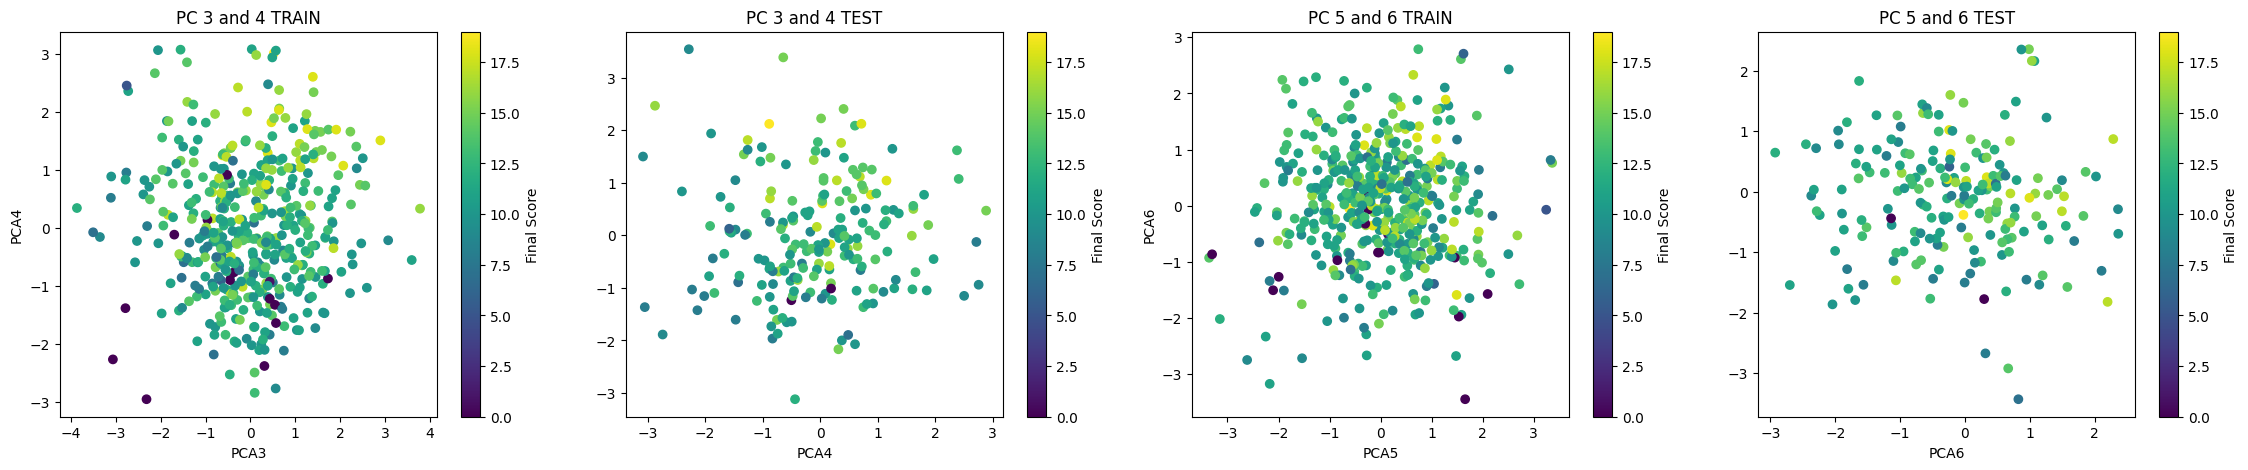

In [9]:
# Plot more PC
fig, axes = plt.subplots(1, 4, figsize=(28, 5))

scatter = axes[0].scatter(X_train_pca['PCA3'], X_train_pca['PCA4'],c = Y_train_pca.values, cmap = 'viridis')
fig.colorbar(scatter, label = "Final Score")
axes[0].set_title('PC 3 and 4 TRAIN')
axes[0].set_xlabel('PCA3')
axes[0].set_ylabel('PCA4')

scatter = axes[1].scatter(X_test_pca['PCA3'], X_test_pca['PCA4'],c = Y_test_pca.values, cmap = 'viridis')
fig.colorbar(scatter, label = "Final Score")
axes[1].set_title('PC 3 and 4 TEST')
axes[1].set_xlabel('PCA3')
axes[1].set_xlabel('PCA4')

scatter = axes[2].scatter(X_train_pca['PCA5'], X_train_pca['PCA6'],c = Y_train_pca.values, cmap = 'viridis')
fig.colorbar(scatter, label = "Final Score")
axes[2].set_title('PC 5 and 6 TRAIN')
axes[2].set_xlabel('PCA5')
axes[2].set_ylabel('PCA6')

scatter = axes[3].scatter(X_test_pca['PCA5'], X_test_pca['PCA6'],c = Y_test_pca.values, cmap = 'viridis')
fig.colorbar(scatter, label = "Final Score")
axes[3].set_title('PC 5 and 6 TEST')
axes[3].set_xlabel('PCA5')
axes[3].set_xlabel('PCA6')

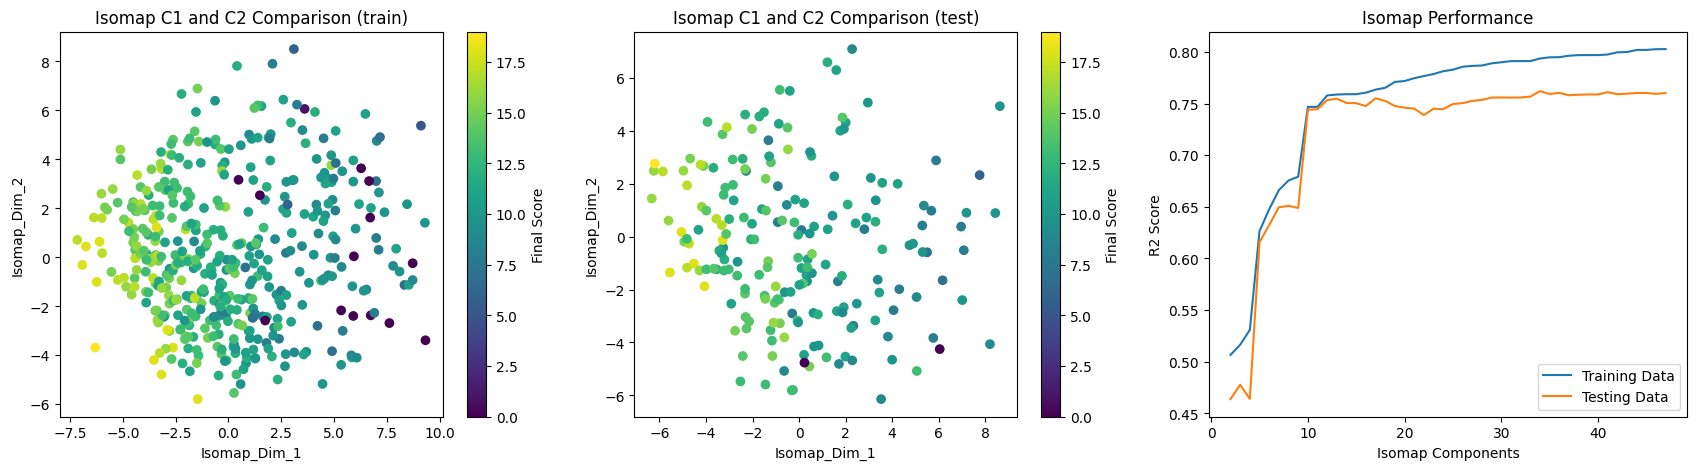

In [10]:
# Set up arrays for plotting
performance_train1 = []
performance_test1 = []
isomap_components = []
X_train_iso = X_test_iso = Y_train_iso = Y_test_iso = 0
model_iso_list = []

# Loop over different numbers of components
for i in range(2, df.shape[1]):

    # Save isomap components used
    isomap_components.append(i)

    # Modify data using isomap
    iso = Isomap(n_neighbors=25, n_components=i)
    isomap_data = iso.fit_transform(df.drop(columns='G3'))
    column_header_train = []
    for j in range(1,i+1):
        column_header_train.append(f"Isomap_Dim_{j}")
    isomap_data = pd.DataFrame(isomap_data, columns = column_header_train)

    # Split data
    X_train_iso, X_test_iso, Y_train_iso, Y_test_iso = train_test_split(isomap_data, df['G3'], test_size = test_split, random_state = 10000)

    # Perform linear regression
    model_iso = LinearRegression()
    model_iso.fit(X_train_iso, Y_train_iso)

    model_iso_list.append(model_iso)

    Y_pred_train_iso = model_iso.predict(X_train_iso)
    Y_pred_test_iso = model_iso.predict(X_test_iso)
    
    performance_train1.append(r2_score(Y_train_iso, Y_pred_train_iso))
    performance_test1.append(r2_score(Y_test_iso, Y_pred_test_iso))

    # Plot the data
    if i == df.shape[1]-1:
        
        fig, axes = plt.subplots(1, 3, figsize=(21, 5))

        scatter = axes[0].scatter(X_train_iso['Isomap_Dim_1'], X_train_iso['Isomap_Dim_2'],c = Y_train_iso.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[0].set_title('Isomap C1 and C2 Comparison (train)')
        axes[0].set_xlabel('Isomap_Dim_1')
        axes[0].set_ylabel('Isomap_Dim_2')

        scatter = axes[1].scatter(X_test_iso['Isomap_Dim_1'], X_test_iso['Isomap_Dim_2'],c = Y_test_iso.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[1].set_title('Isomap C1 and C2 Comparison (test)')
        axes[1].set_xlabel('Isomap_Dim_1')
        axes[1].set_ylabel('Isomap_Dim_2')

        axes[2].plot(isomap_components, performance_train1, label = 'Training Data')
        axes[2].plot(isomap_components, performance_test1, label = 'Testing Data')
        axes[2].legend(loc = 'lower right')
        axes[2].set_title('Isomap Performance')
        axes[2].set_xlabel('Isomap Components')
        axes[2].set_ylabel('R2 Score')


### Now lets test the models on the provided math dataset!

In [11]:
# Testing Performances on another dataset (math students)
df_math = pd.read_csv(file_path_math, sep = ';')

binary_features = ['school', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
nominal_features = ['sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian']

for feature in binary_features:
    df1 = df_math.copy(deep = True)
    df1[feature] = pd.Categorical(df1[feature])
    df_math[feature] = df1[feature].cat.codes

for feature in nominal_features:
    df1 = pd.get_dummies(df_math[feature], dtype='float')
    df_math = df_math.drop(columns = [feature])
    df_math = pd.concat([df_math, df1], axis = 1)

# Some duplicate columns names exist
for feature in df_math.columns:
    cols = df_math.columns.tolist()
    seen = {}
    for i, col in enumerate(cols):
        if col in seen:
            seen[col] += 1
            cols[i] = f"{col}_{seen[col]}"
        else:
            seen[col] = 0
    df_math.columns = cols

scaler = StandardScaler()
scaler_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime',
       'failures', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

scaled_data = scaler.fit_transform(df_math[scaler_features])
scaled_data = pd.DataFrame(scaled_data, columns=scaler_features)

# Update the original dataframe with scaled values
scaled_data['G3'] = df_math['G3']

df_math[scaler_features] = scaled_data

df_math.columns

Index(['school', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime',
       'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'F',
       'M', 'R', 'U', 'at_home', 'health_1', 'other', 'services', 'teacher',
       'at_home_1', 'health_2', 'other_1', 'services_1', 'teacher_1', 'course',
       'home', 'other_2', 'reputation', 'father', 'mother', 'other_3'],
      dtype='object')

In [12]:
X_train_math, X_test_math, Y_train_math, Y_test_math = train_test_split(df_math.drop(columns=['G3']), df_math['G3'], test_size = test_split, random_state = 10000)

In [13]:
# Linear Regression on math dataset
Y_pred_math = model.predict(X_test_math)
print(f"Standard R2 Score: {r2_score(Y_test_math, Y_pred_math)}")

# Some scores for visualization
for i in range(0,5):
    print(f"For student {i}, model prediction: {Y_pred_math[i]}, actual score: {Y_test_math.iloc[i]}")

Standard R2 Score: 0.6517576585519875
For student 0, model prediction: 16.079315100786364, actual score: 18
For student 1, model prediction: 14.632948258099677, actual score: 15
For student 2, model prediction: 12.194180197014145, actual score: 12
For student 3, model prediction: 9.78256745095835, actual score: 8
For student 4, model prediction: 11.041057679594747, actual score: 0


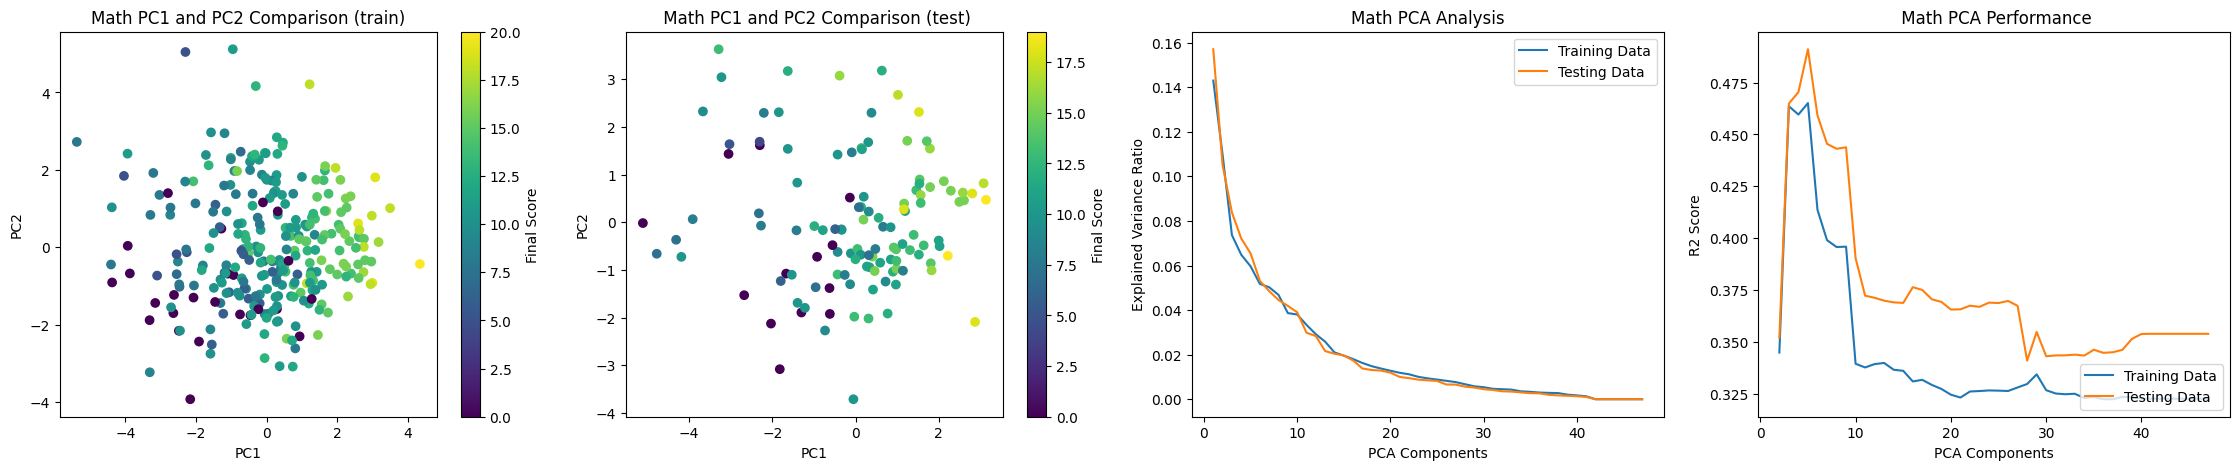

In [14]:
# Set up arrays for plotting
performance_train = []
performance_test = []

# Loop over different numbers of components
for i in range(2, df_math.shape[1]):

    # Modify data using PCA
    pca = PCA(n_components = i)

    principle_components_train = pca.fit_transform(X_train_math)
    explained_variance_ratio_train = pca.explained_variance_ratio_
    principle_components_test = pca.transform(X_test_math)

    # Get test explained variance separately
    pca_test = PCA(n_components = i)
    test_fit = pca_test.fit_transform(X_test_math)
    explained_variance_ratio_test = pca_test.explained_variance_ratio_

    column_header = []
    for j in range(1,i+1):
        column_header.append(f"PCA{j}")

    # Reassign new X data
    X_train_pca_math = pd.DataFrame(principle_components_train, columns = column_header)
    X_test_pca_math = pd.DataFrame(principle_components_test, columns = column_header)

    # Perform linear regression
    Y_pred_train_pca_math = model_pca_list[i-2].predict(X_train_pca_math)
    Y_pred_test_pca_math = model_pca_list[i-2].predict(X_test_pca_math)

    # Obtain Performance
    performance_train.append(r2_score(Y_train_math, Y_pred_train_pca_math))
    performance_test.append(r2_score(Y_test_math, Y_pred_test_pca_math))

    # Plot the data
    if i == df_math.shape[1]-1:

        fig, axes = plt.subplots(1, 4, figsize=(28, 5))

        scatter = axes[0].scatter(X_train_pca_math['PCA1'], X_train_pca_math['PCA2'],c = Y_train_math.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[0].set_title('Math PC1 and PC2 Comparison (train)')
        axes[0].set_xlabel('PC1')
        axes[0].set_ylabel('PC2')

        scatter = axes[1].scatter(X_test_pca_math['PCA1'], X_test_pca_math['PCA2'],c = Y_test_math.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[1].set_title(' Math PC1 and PC2 Comparison (test)')
        axes[1].set_xlabel('PC1')
        axes[1].set_ylabel('PC2')

        axes[2].plot([1] + pca_components, explained_variance_ratio_train, label = 'Training Data')
        axes[2].plot([1] + pca_components, explained_variance_ratio_test, label = 'Testing Data')
        axes[2].legend(loc = 'upper right')
        axes[2].set_title('Math PCA Analysis')
        axes[2].set_xlabel('PCA Components')
        axes[2].set_ylabel('Explained Variance Ratio')

        axes[3].plot(pca_components, performance_train, label = 'Training Data')
        axes[3].plot(pca_components, performance_test, label = 'Testing Data')
        axes[3].legend(loc = 'lower right')
        axes[3].set_title(' Math PCA Performance')
        axes[3].set_xlabel('PCA Components')
        axes[3].set_ylabel('R2 Score')


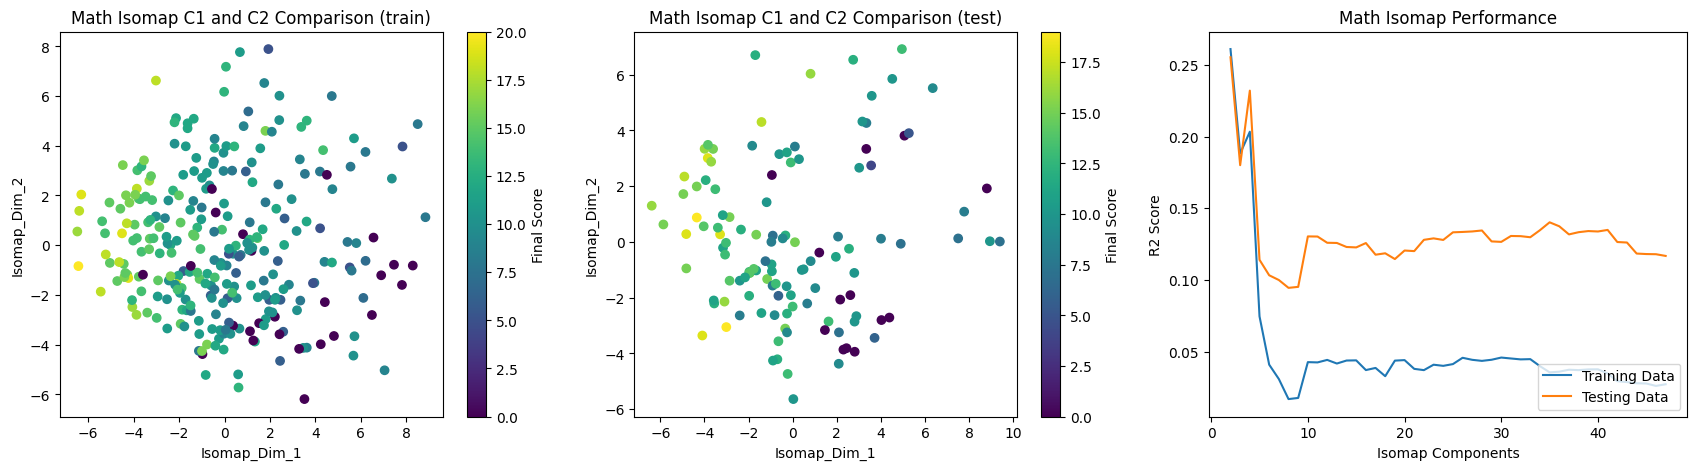

In [15]:
# Set up arrays for plotting
performance_train1 = []
performance_test1 = []

# Loop over different numbers of components
for i in range(2, df.shape[1]):

    # Modify data using isomap
    iso = Isomap(n_neighbors=25, n_components=i)
    isomap_data = iso.fit_transform(df_math.drop(columns='G3'))
    column_header_train = []
    for j in range(1,i+1):
        column_header_train.append(f"Isomap_Dim_{j}")
    isomap_data = pd.DataFrame(isomap_data, columns = column_header_train)

    # Split data
    X_train_iso_math, X_test_iso_math, Y_train_iso_math, Y_test_iso_math = train_test_split(isomap_data, df_math['G3'], test_size = test_split, random_state = 10000)

    # Perform linear regression

    Y_pred_train_iso_math = model_iso_list[i-2].predict(X_train_iso_math)
    Y_pred_test_iso_math = model_iso_list[i-2].predict(X_test_iso_math)
    
    performance_train1.append(r2_score(Y_train_iso_math, Y_pred_train_iso_math))
    performance_test1.append(r2_score(Y_test_iso_math, Y_pred_test_iso_math))

    # Plot the data
    if i == df.shape[1]-1:
        
        fig, axes = plt.subplots(1, 3, figsize=(21, 5))

        scatter = axes[0].scatter(X_train_iso_math['Isomap_Dim_1'], X_train_iso_math['Isomap_Dim_2'],c = Y_train_iso_math.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[0].set_title('Math Isomap C1 and C2 Comparison (train)')
        axes[0].set_xlabel('Isomap_Dim_1')
        axes[0].set_ylabel('Isomap_Dim_2')

        scatter = axes[1].scatter(X_test_iso_math['Isomap_Dim_1'], X_test_iso_math['Isomap_Dim_2'],c = Y_test_iso_math.values, cmap = 'viridis')
        fig.colorbar(scatter, label = "Final Score")
        axes[1].set_title('Math Isomap C1 and C2 Comparison (test)')
        axes[1].set_xlabel('Isomap_Dim_1')
        axes[1].set_ylabel('Isomap_Dim_2')

        axes[2].plot(isomap_components, performance_train1, label = 'Training Data')
        axes[2].plot(isomap_components, performance_test1, label = 'Testing Data')
        axes[2].legend(loc = 'lower right')
        axes[2].set_title('Math Isomap Performance')
        axes[2].set_xlabel('Isomap Components')
        axes[2].set_ylabel('R2 Score')
